In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
# Завантаження датасету
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# Видалення ID користувача
data.drop(columns=['User ID'], inplace=True)

In [4]:
# Перетворення категоріальної фічі на бінарну
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [5]:
# Оберіть фічі та значення, які будуть передбачатись
X = data.drop(columns=['Purchased'])
y = data['Purchased']

In [6]:
# Нормалізація фічей
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Розбивка датасету на тренувальний та тестовий
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Навчання моделі логістичної регресії
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
# Передбачення
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [11]:
# Виведення метрик якості моделі
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8875
Precision: 0.9130434782608695
Recall: 0.75


In [13]:
# Побудова матриці
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[50  2]
 [ 7 21]]


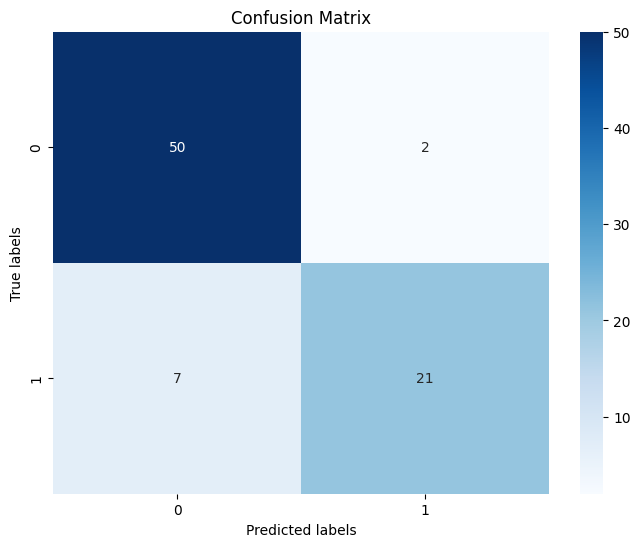

In [16]:
import seaborn as sns

# Побудова матриці плутанини
conf_matrix = confusion_matrix(y_test, y_pred)

# Побудова графіку матриці плутанини
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

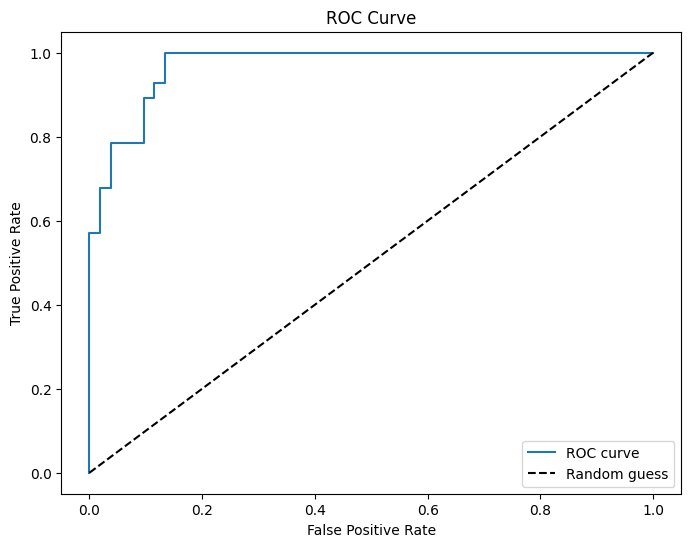

In [14]:
# Побудова ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

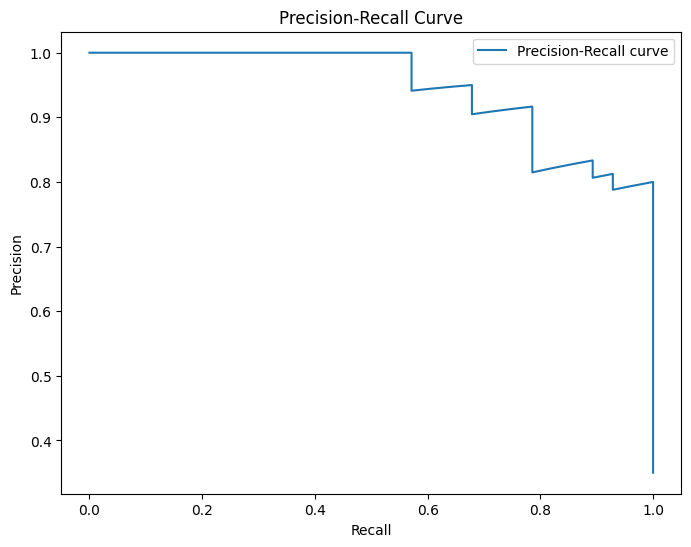

In [15]:
# Побудова Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()